# Problema 3.3

Usando la técnica de la transformada de Laplace, encontrar las
respuestas transitoria y estacionaria del sistema descrito por la
ecuación diferencial siguiente:

$$\frac{\mathrm{d}^2 y}{\mathrm{d}t^2} + 3 \frac{\mathrm{d}y}{\mathrm{d}t} + 2 y = 1$$

con las condiciones iniciales $y (0) = y' (0) = 1$.

----

**Solución**

La transformada de una derivada de una función y de la derivada segunda
es:

$$\mathcal{L} \left( \frac{\mathrm{d}f (t)}{\mathrm{d}t} \right) = s f (s) - f (0)$$

$$\begin{equation}
     \mathcal{L} \left( \frac{\mathrm{d}^2 f (t)}{\mathrm{d}t^2} \right) = - \left.
     \frac{\mathrm{d}}{\mathrm{d}t} f (t) \right|_{t = 0} + s^2 f (s) - f (0) s
   \end{equation}$$ 
   
Realizando la transformada de Laplace a la
ecuación diferencial a resolver y considerando las condiciones iniciales
se obtiene:


$$s^{2_{}}  \bar{y} - s - 1 + 3 (s \bar{y} - 1) + 2 \bar{y} = \frac{1}{s}$$


Despejando $\bar{y}$:

$$\bar{y} = \frac{s^2 + 4 s + 1}{s (s + 1)  (s + 2)}$$

Para poder
realizar la transformada inversa de Laplace y poder obtener *y(t)* hay
que realizar primero la descomposición en fracciones simples de
$\bar{y} (s)$:

$$\frac{s^2 + 4 s + 1}{s (s + 1)  (s + 2)} = \frac{A}{s} + \frac{B}{s + 1} +
   \frac{C}{s + 2}$$
   
   Sumando las fracciones simples y simplificando el
denominador se obtiene la siguiente ecuación:

$$s^2 + 4 s + 1 = A (s + 1)  (s + 2) + Bs (s + 2) + Cs (s + 1)$$

Operando se obtiene el sistema de ecuaciones siguiente:

$$\left\{\begin{array}{l}
     (1) s^2 = (A + B + C) s^2\\
     (4) s = (3 A + 3 B + C) s\\
     1 = 2 A
   \end{array}\right.$$ 
   
   La solución de este sistema es
$A = \frac{1}{2}$, $B = 2$ y $C = -
\frac{3}{2}$. Por tanto,

$$\bar{y} = \frac{\frac{1}{2}}{s} + \frac{2}{s + 1} - \frac{\frac{3}{2}}{s +
   2}$$ 
   
Realizando la transformada inversa de Laplace, consultando las
tablas, se obtiene:

$$y (t) = \frac{1}{2} U (t) + 2 \mathrm{e}^{- t} - \frac{3}{2} \mathrm{e}^{- 2 t}$$

donde $U (t)$ es el escalón unidad.

La parte estacionaria de $y (t)$ es $\frac{1}{2} U (t)$ ya que:

$$\lim_{t \rightarrow \infty} y (t) = \frac{1}{2}$$

El resto de la solución es la respuesta transitoria, es decir, la parte de la solución dependiente del tiempo.

*Resolución con *Sympy**

En primer lugar, cargaremos la librería y definiremos las variables $s$ y $t$. Como es habitual, especificaremos que el tiempo es una variable real. Además, definiremos $y$ como una función, ya que $y(t)$ será nuestra función incógnita:

In [1]:
from sympy import *
init_printing()

t = symbols("t", real=True)
s = symbols("s")

y = Function("y")

El siguiente paso es definir las condiciones iniciales, $y(0) = 1$ y $\frac{\mathrm{d} y(0)}{\mathrm{d} t} = 1$. Observad la sintaxis:

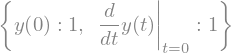

In [2]:
ic = {y(0):1, diff(y(t), t).subs(t, 0):1}
ic

Para reducir errores es conveniente definir la ecuación diferencial y la llamaremos `deq`. Para definir una ecuación en *Sympy* se utiliza la función `Eq(lhs, rhs)` donde `lhs` indica la parte derecha de la igualdad y `rhs`la parte derecha:

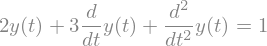

In [3]:
deq = Eq(diff(y(t), t, 2) + 3*diff(y(t), t) + 2*y(t), 1)
deq

Ya estamos en condiciones de resolver la ecuación diferencial mediante la instrucción `dsolve()`, que utiliza internamente la transformada inversa de Laplace. La solución de la ecuación la guardamos en la variable `sol`
:

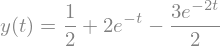

In [4]:
sol = dsolve(deq, y(t), ics=ic)
sol

El resultado es una igualdad, en el caso de que nos interese la parte derecha:

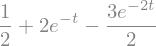

In [5]:
sol.rhs

Si es la parte izquierda:

In [6]:
sol.lhs

Para encontar la **respuesta estacionaria** hay que calcular el límite cuando el tiempo tiende a infinito, ya que entonces habrá desaparecido la influencia de la respuesta transitoria:

In [7]:
limit(sol.rhs, t, oo)